# Intro to NN for Computer Vision
## Using the Fashion-MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

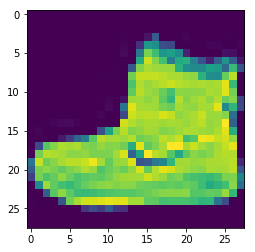

In [3]:
plt.imshow(train_images[0])

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Define the NN
- `Sequential` defines the layers of the network
- `Flatten` takes the square and turns it into a 1D-array
- `Dense` adds a layer to the network, with a:
 - A `ReLu` activation function: If X>0 return X, else 0`
 - Or a `Softmax` function: finds the largest output in the array and turns into 1, keeping the rest at 0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), ## 28 because the image is a 28x28 pixel image
    keras.layers.Dense(1024, activation=tf.nn.relu), # 128 layers just because
#     keras.layers.Dense(512, activation=tf.nn.relu), # 128 layers just because
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 output layers because there are 10 possible outcome labels
])

W0623 01:23:58.308922 139965240948544 deprecation.py:506] From /home/elder/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.6):
            print("\nReached 60% accuracy, interrupting training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [7]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 15, callbacks=[callbacks])

Epoch 1/15
59648/60000 [============================>.] - ETA: 0s - loss: 0.4726 - acc: 0.8297
Reached 60% accuracy, interrupting training!
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4721 - acc: 0.8298


In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3996 - acc: 0.8559


[0.39958176052570343, 0.8559]

In [9]:
predictions = model.predict(test_images)

In [10]:
## Find mispredictions
mispred = []
for index,pred in enumerate(predictions):
    predicted_label = np.argmax(pred)
    label = test_labels[index]
    if predicted_label != label:
        mispred.append(index)
        
print("Mispredicted indexes", mispred)

Mispredicted indexes [17, 21, 23, 25, 40, 42, 49, 51, 66, 67, 68, 72, 73, 89, 98, 103, 107, 127, 136, 147, 150, 153, 222, 227, 239, 241, 244, 247, 248, 249, 252, 255, 268, 271, 282, 283, 286, 299, 313, 314, 315, 316, 320, 322, 324, 325, 332, 337, 344, 359, 361, 367, 378, 381, 382, 396, 406, 407, 408, 409, 441, 444, 454, 457, 460, 465, 474, 480, 490, 491, 526, 527, 529, 541, 562, 563, 565, 569, 570, 572, 577, 578, 581, 586, 587, 595, 607, 608, 623, 634, 635, 639, 663, 670, 671, 680, 688, 689, 697, 701, 711, 722, 725, 732, 753, 760, 787, 800, 801, 805, 830, 844, 851, 860, 881, 887, 890, 902, 905, 907, 909, 921, 926, 930, 935, 963, 965, 966, 968, 971, 976, 977, 979, 987, 993, 994, 1005, 1008, 1025, 1053, 1054, 1055, 1056, 1058, 1065, 1101, 1104, 1107, 1111, 1116, 1129, 1139, 1152, 1160, 1162, 1174, 1185, 1188, 1192, 1197, 1210, 1213, 1223, 1231, 1235, 1254, 1269, 1280, 1294, 1297, 1300, 1315, 1317, 1326, 1329, 1336, 1339, 1341, 1356, 1374, 1377, 1388, 1390, 1396, 1399, 1408, 1425, 1438, 1

Prediction: 2
Label: 4


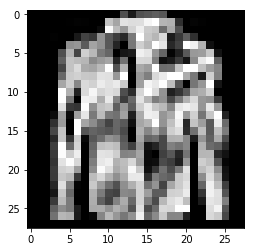

In [11]:
print("Prediction:", np.argmax(predictions[mispred[0]]))
print("Label:", test_labels[mispred[0]])
plt.imshow(test_images[mispred[0]], cmap='gray')